In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
import matplotlib.mlab as mlab
from scipy.signal import iirnotch, lfilter, freqz, butter, welch
from prettytable import PrettyTable

folder_path =[]
d = []
type = ["Normal", "Agressive"]
mode = 1
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]





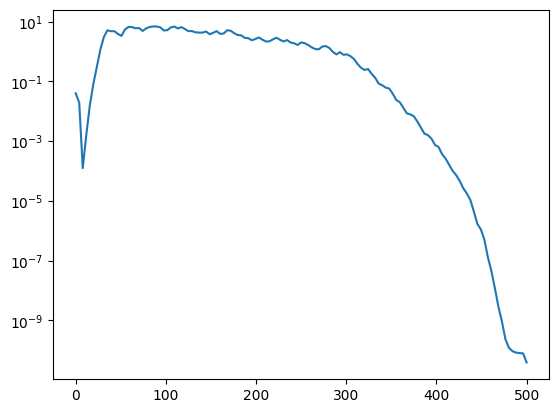

In [19]:
move = d[0]
file = move
folder_path = fr"data\sub{1}\Normal\txt"
df = pd.read_csv(folder_path + "\\" + file, sep = "\t", header = None, names=name)
Fs = 1000

b_notch,a_notch = iirnotch(50,30,Fs)
b_band, a_band = butter(4,[30/(Fs/2),300/(Fs/2)], 'band')

f_notch, h_notch = freqz(b_notch,a_notch)
f_band, h_band = freqz(b_band,a_band)

b_comb = np.convolve(b_notch,b_band)
a_comb = np.convolve(a_notch,a_band)

f_comv, h_comb = freqz(b_comb,a_comb)
y = lfilter(b_comb,a_comb,df["Right Bicep"])


f, Pxx = welch(y, fs=Fs, nperseg=256, noverlap=0.5*256)
plt.plot(f, Pxx)
plt.yscale('log')

FileNotFoundError: [Errno 2] No such file or directory: 'data\\sub1\\Aggressive\\txt\\Bowing.txt'

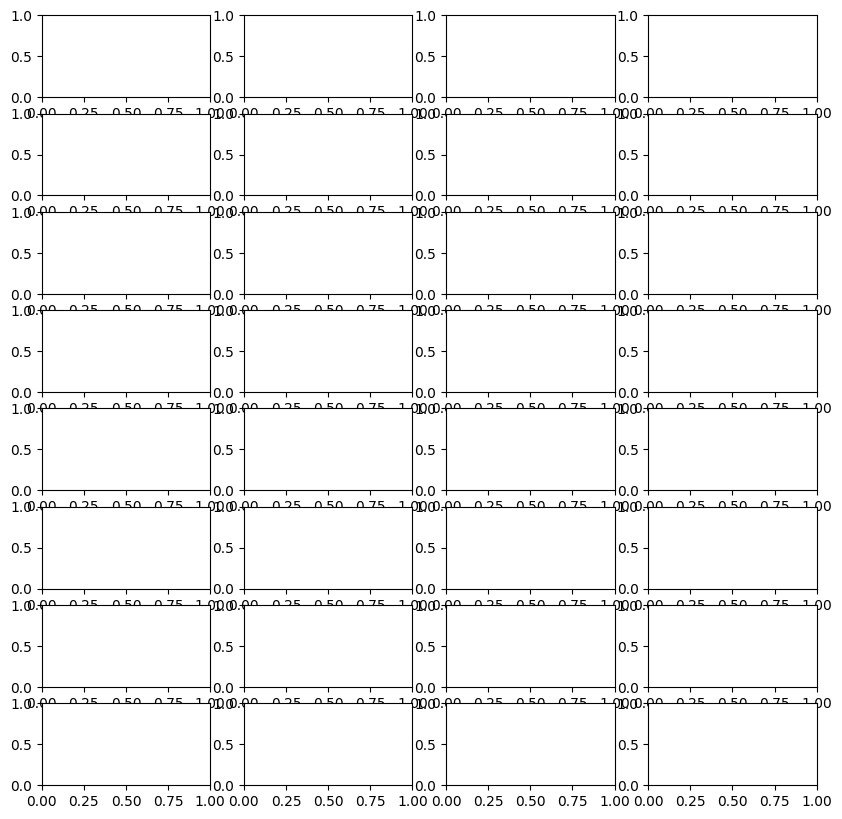

In [62]:
fig, axes = plt.subplots(8,4, figsize=(10,10))
signal_mean = np.zeros(shape=(8,4))
skib = np.zeros(shape=(1,8))
type = ["Normal","Aggressive"]
mode = 1
for i in range(1,5):
    file = move
    folder_path = fr"data\sub{i}\{type[mode]}\txt"
    df = pd.read_csv(folder_path + "\\" + file, sep = "\t", header = None, names=name)

    Fs = 1000
    T = 1/Fs
    L = len(df)
    t = np.arange(0, len(df))*T
    f = Fs*np.arange(0,L/2)/L

    b_notch,a_notch = iirnotch(50,30,Fs)
    b_band, a_band = butter(4,[30/(Fs/2),300/(Fs/2)], 'band')

    f_notch, h_notch = freqz(b_notch,a_notch)
    f_band, h_band = freqz(b_band,a_band)

    b_comb = np.convolve(b_notch,b_band)
    a_comb = np.convolve(a_notch,a_band)

    f_comv, h_comb = freqz(b_comb,a_comb)
    c = 0
    tmp = []
    for j in name:
        Y = np.fft.fft(y)
        P2 = abs(Y/L)
        P1 = P2[0:L//2+1]
        signal_mean[c][i-1] = np.mean(np.abs(P1))
        tmp.append(np.mean(np.abs(P1)))
        if len(P1) != len(f):
            P1 = P1[:-1]
        P1[1:-1] = 2*P1[1:-1]
        axes[c, i-1].plot(f,P1,linewidth=0.5)
        axes[c, i-1].grid("minor")
        if i == 1:
            axes[c, i-1].set_ylabel(j)
        else:
            axes[c, i-1].set_ylabel("Magnitude [dB]")
        if c == 0:
            axes[c, i-1].set_title(f"sub{i}")
        axes[c, i-1].set_xlabel("Frequency [Hz]")
        axes[c, i-1].set_yscale('log')
        c += 1
    skib = np.vstack((skib,tmp))
fig.suptitle(f"Frequency Spectrum of {type[mode]} {file.rsplit('.')[0]}", y=1)
plt.tight_layout(pad=0.5)
plt.show()

    


Plots of PSD all moves

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, iirnotch, lfilter

type = ["Normal","Aggressive"]
mode = 0
Peak = np.zeros(shape=(1, 8))
Power = np.zeros(shape=(1, 8))
MAV = np.zeros(shape=(1, 8))
signal_mean = np.zeros(shape=(1, 8))

c = 0

for move in d:
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 4, figsize=(25,12.5), constrained_layout=True)
        c = 0
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_power = []
        tmp_mav = []

        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            nperseg = 200
            f_PSD, Pxx_PSD = welch(y, fs=Fs, nperseg=nperseg, noverlap=0.5 * nperseg)

            tmp.append(f_PSD[np.argmax(Pxx_PSD)])  
            tmp_power.append(np.sum(Pxx_PSD) * (f_PSD[1] - f_PSD[0]))  
            tmp_mav.append(np.nanmean(np.abs(y)))  

            # Plot improvements
            axes_PSD[c, i - 1].plot(f_PSD, Pxx_PSD, linewidth=1, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_yscale("log")
            axes_PSD[c, i - 1].set_xlabel("Frequency [Hz]", fontsize=12)
            axes_PSD[c, i - 1].set_ylabel("Magnitude [dB/Hz]", fontsize=12)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=10)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=14, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=12, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize="x-small", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))


        Peak = np.vstack((Peak, tmp))
        Power = np.vstack((Power, tmp_power))
        MAV = np.vstack((MAV, tmp_mav))
    c += 1
    # Bigger title for the full figure

    # Improve layout for better spacing
    fig_PSD.suptitle(f"Power Spectral Density (PSD) of {type[mode]} Activity",fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout(pad=1)
plt.show()


Mean Plots

FileNotFoundError: [Errno 2] No such file or directory: 'data\\sub1\\Aggressive\\txt\\Bowing.txt'

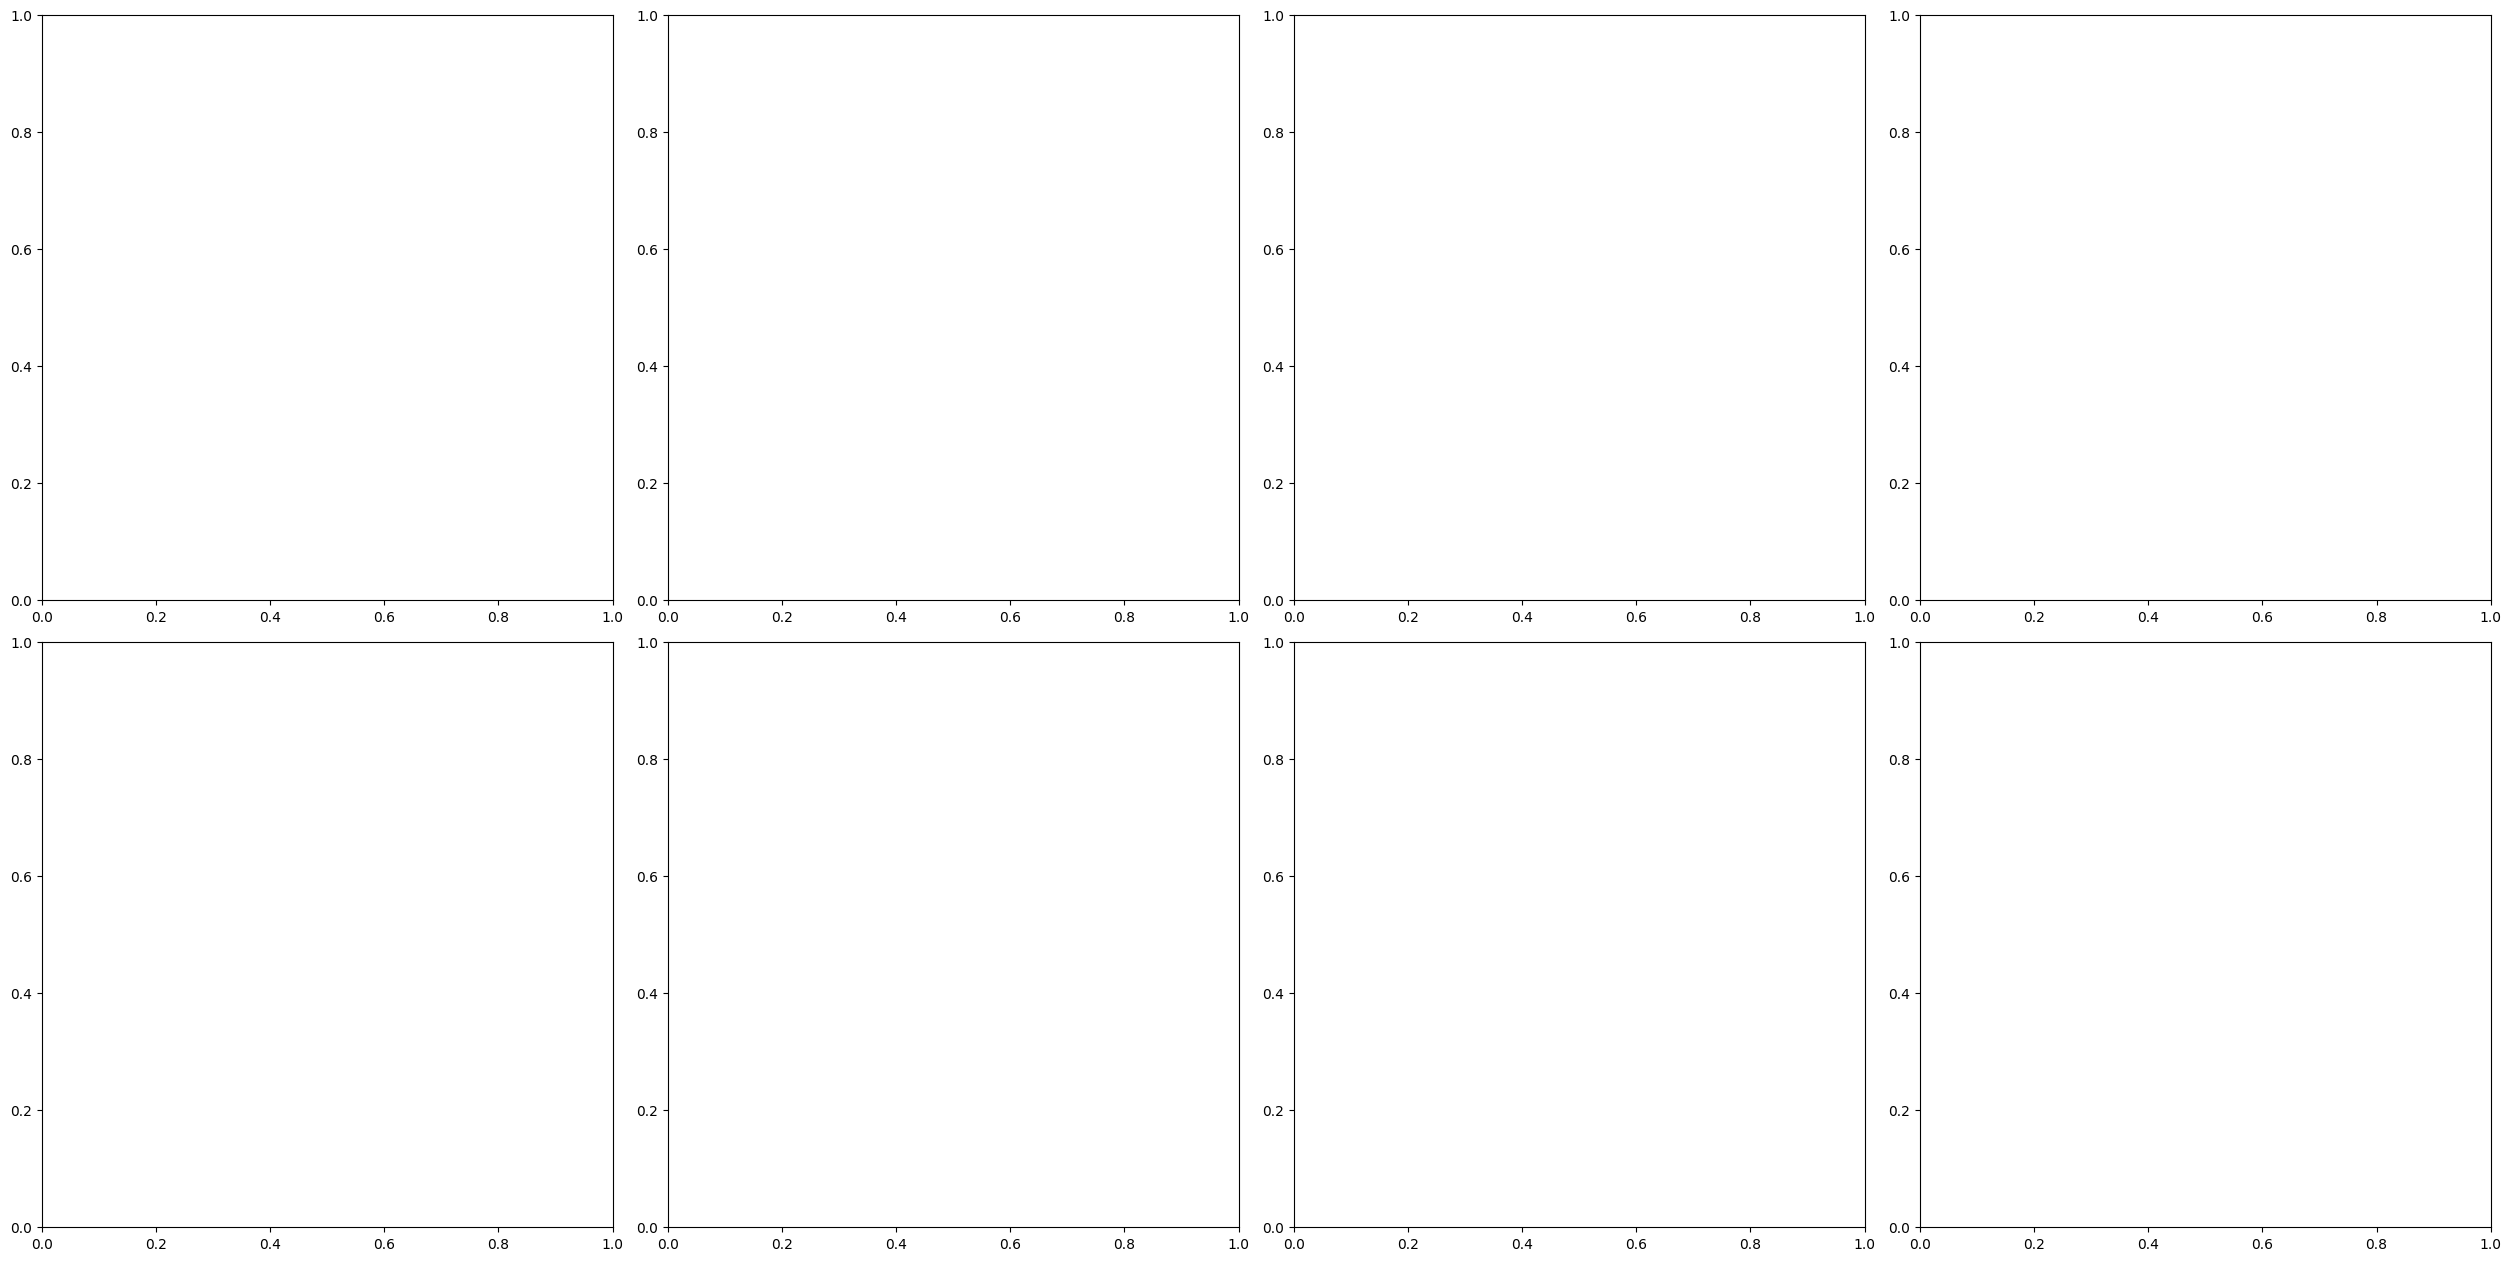

In [61]:
window = 200
type = ["Normal","Aggressive"]
mode = 1
c = 0

for move in d:
    means = np.zeros(shape=(8, 4))
    stds = np.zeros(shape=(8, 4))
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 4, figsize=(25,12.5), constrained_layout=True)
        c = 0
    # subject loop inside the move loop
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                tmp_mav.append(np.mean(np.abs(y[k:k+window])))
                tmp_std.append(np.std((y[k:k+window])))
            stds[count][i-1] = np.mean(tmp_std)
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
            # Plot improvements
            axes_PSD[c, i - 1].plot(tmp_mav, linewidth=1, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_xlabel("Window number", fontsize=12)
            axes_PSD[c, i - 1].set_ylabel("Mean Absolut Value", fontsize=12)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=10)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=14, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=12, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize="x-small", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))
    c += 1
    # Bigger title for the full figure
    fig_PSD.suptitle(f"Mean Absolute Value of {type[mode]} Activity",fontsize=16, fontweight="bold", y=1.03)
    # Improve layout for better spacing
plt.tight_layout(pad=1)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data\\sub1\\Aggressive\\txt\\Bowing.txt'

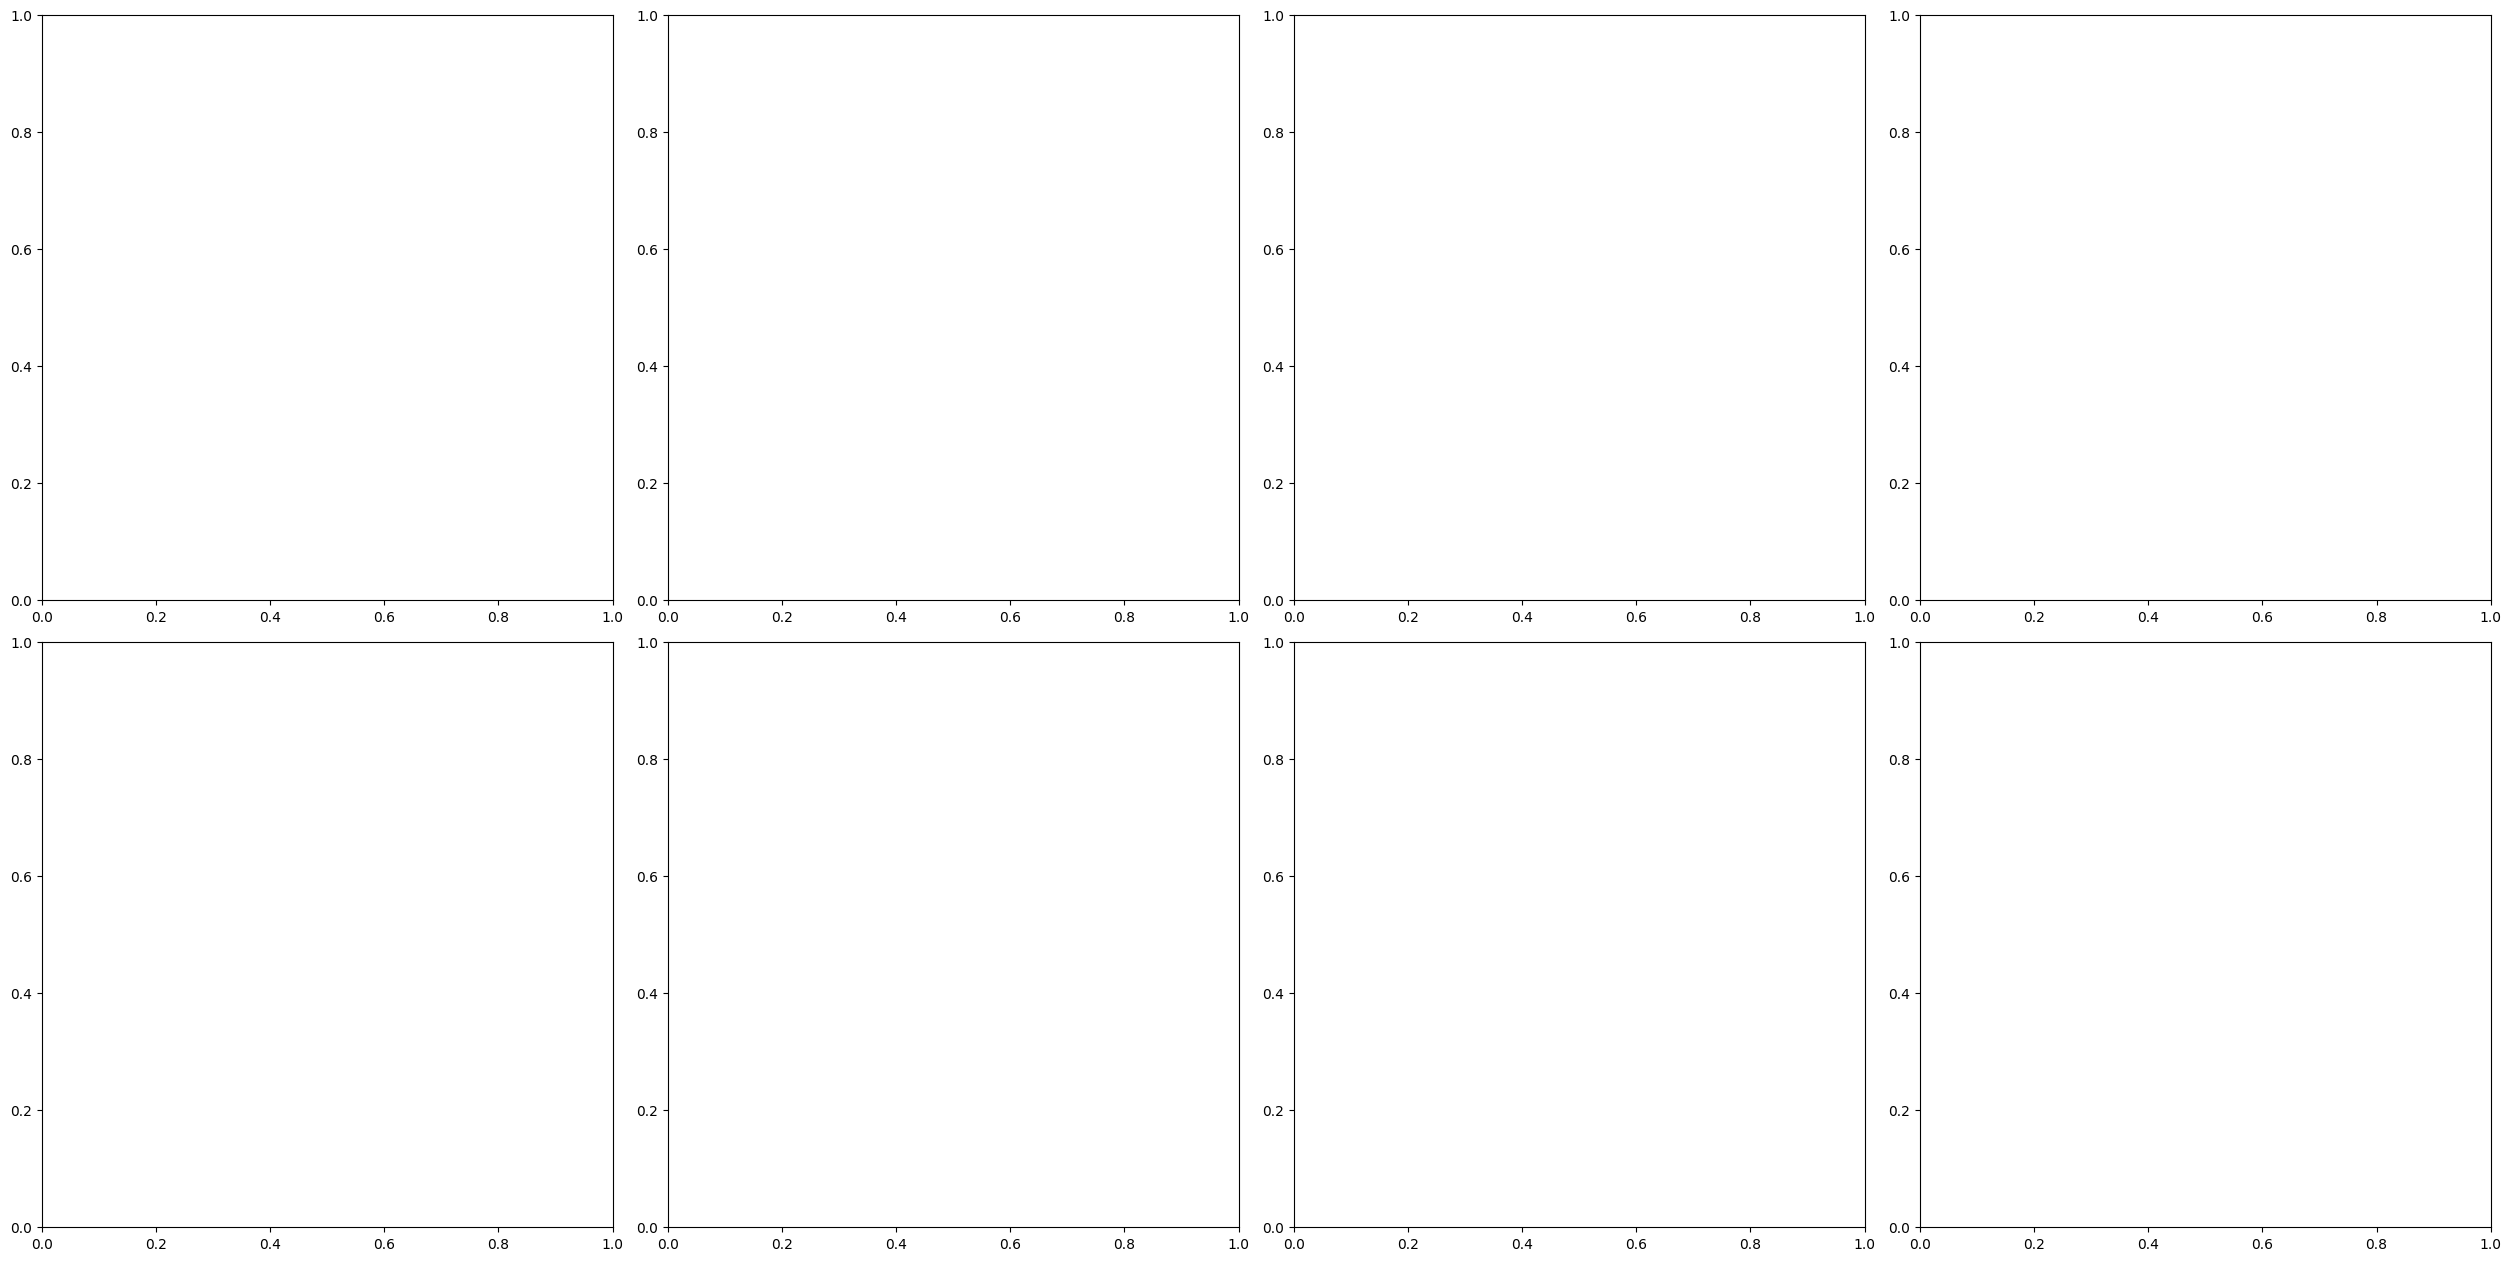

In [60]:
window = 200
type = ["Normal","Aggressive"]
mode = 1
c = 0

for move in d:
    means = np.zeros(shape=(8, 4))
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 4, figsize=(25,12.5), constrained_layout=True)
        c = 0
    # subject loop inside the move loop
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                tmp_mav.append(np.std((y[k:k+window])))
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
            # Plot improvements
            axes_PSD[c, i - 1].plot(tmp_mav, linewidth=1, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_xlabel("Window number", fontsize=12)
            axes_PSD[c, i - 1].set_ylabel("Mean Absolut Value", fontsize=12)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=10)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=14, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=12, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize="x-small", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))
    c += 1
    # Bigger title for the full figure
    fig_PSD.suptitle(f"Power Spectral Density (PSD) of {type[mode]} Activity",fontsize=16, fontweight="bold", y=1.03)
    # Improve layout for better spacing
plt.tight_layout(pad=1)
plt.show()


In [59]:
window = 200
type = ["Normal","Aggressive"]
mode = 1

c = 0

for move in d:
    means = np.zeros(shape=(8, 4))
    stds = np.zeros(shape=(8, 4))
    # subject loop inside the move loop
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                nperseg = 200
                tmp_mav.append(np.mean(np.abs(y[k:k+window])))
                tmp_std.append(np.std((y[k:k+window])))
            stds[count][i-1] = np.mean(tmp_std)
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
    print(move.rsplit(".txt")[0])
    for skib in range(8):
        print(round(np.mean(stds, axis=1)[skib], 8))



FileNotFoundError: [Errno 2] No such file or directory: 'data\\sub1\\Aggressive\\txt\\Bowing.txt'

In [36]:
print(y)

[-20.24785506 -76.92433408 -96.39091775 ...  20.64516873  17.92511628
  11.89225547]


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_2796\3185126018.py:75: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1)


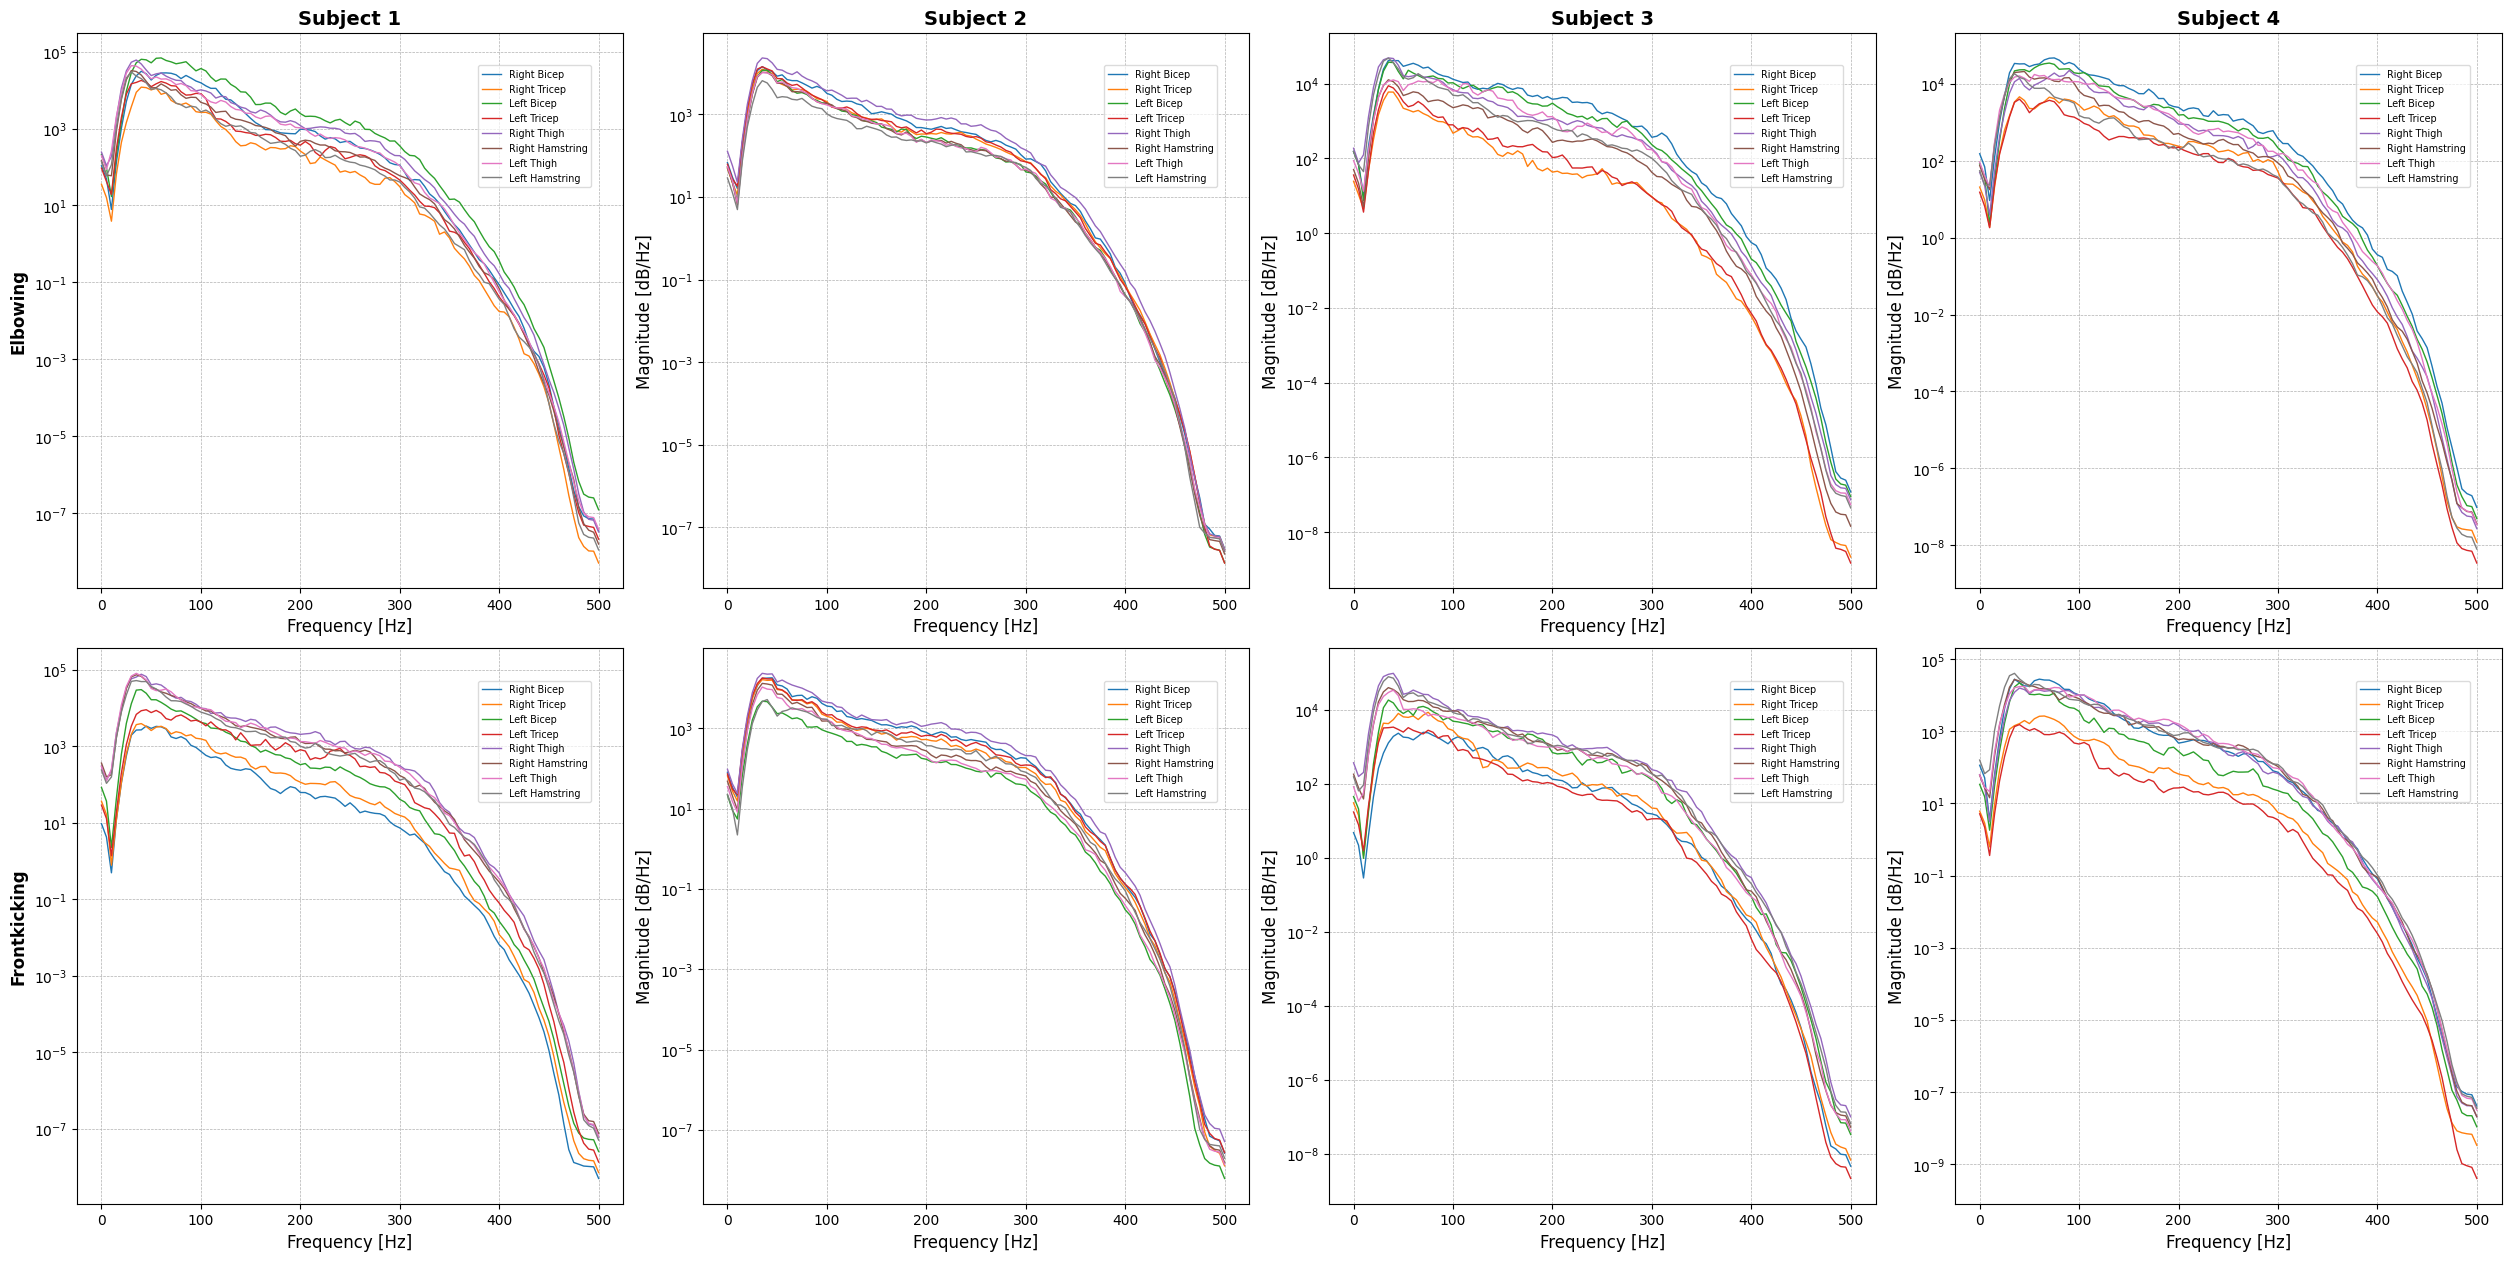

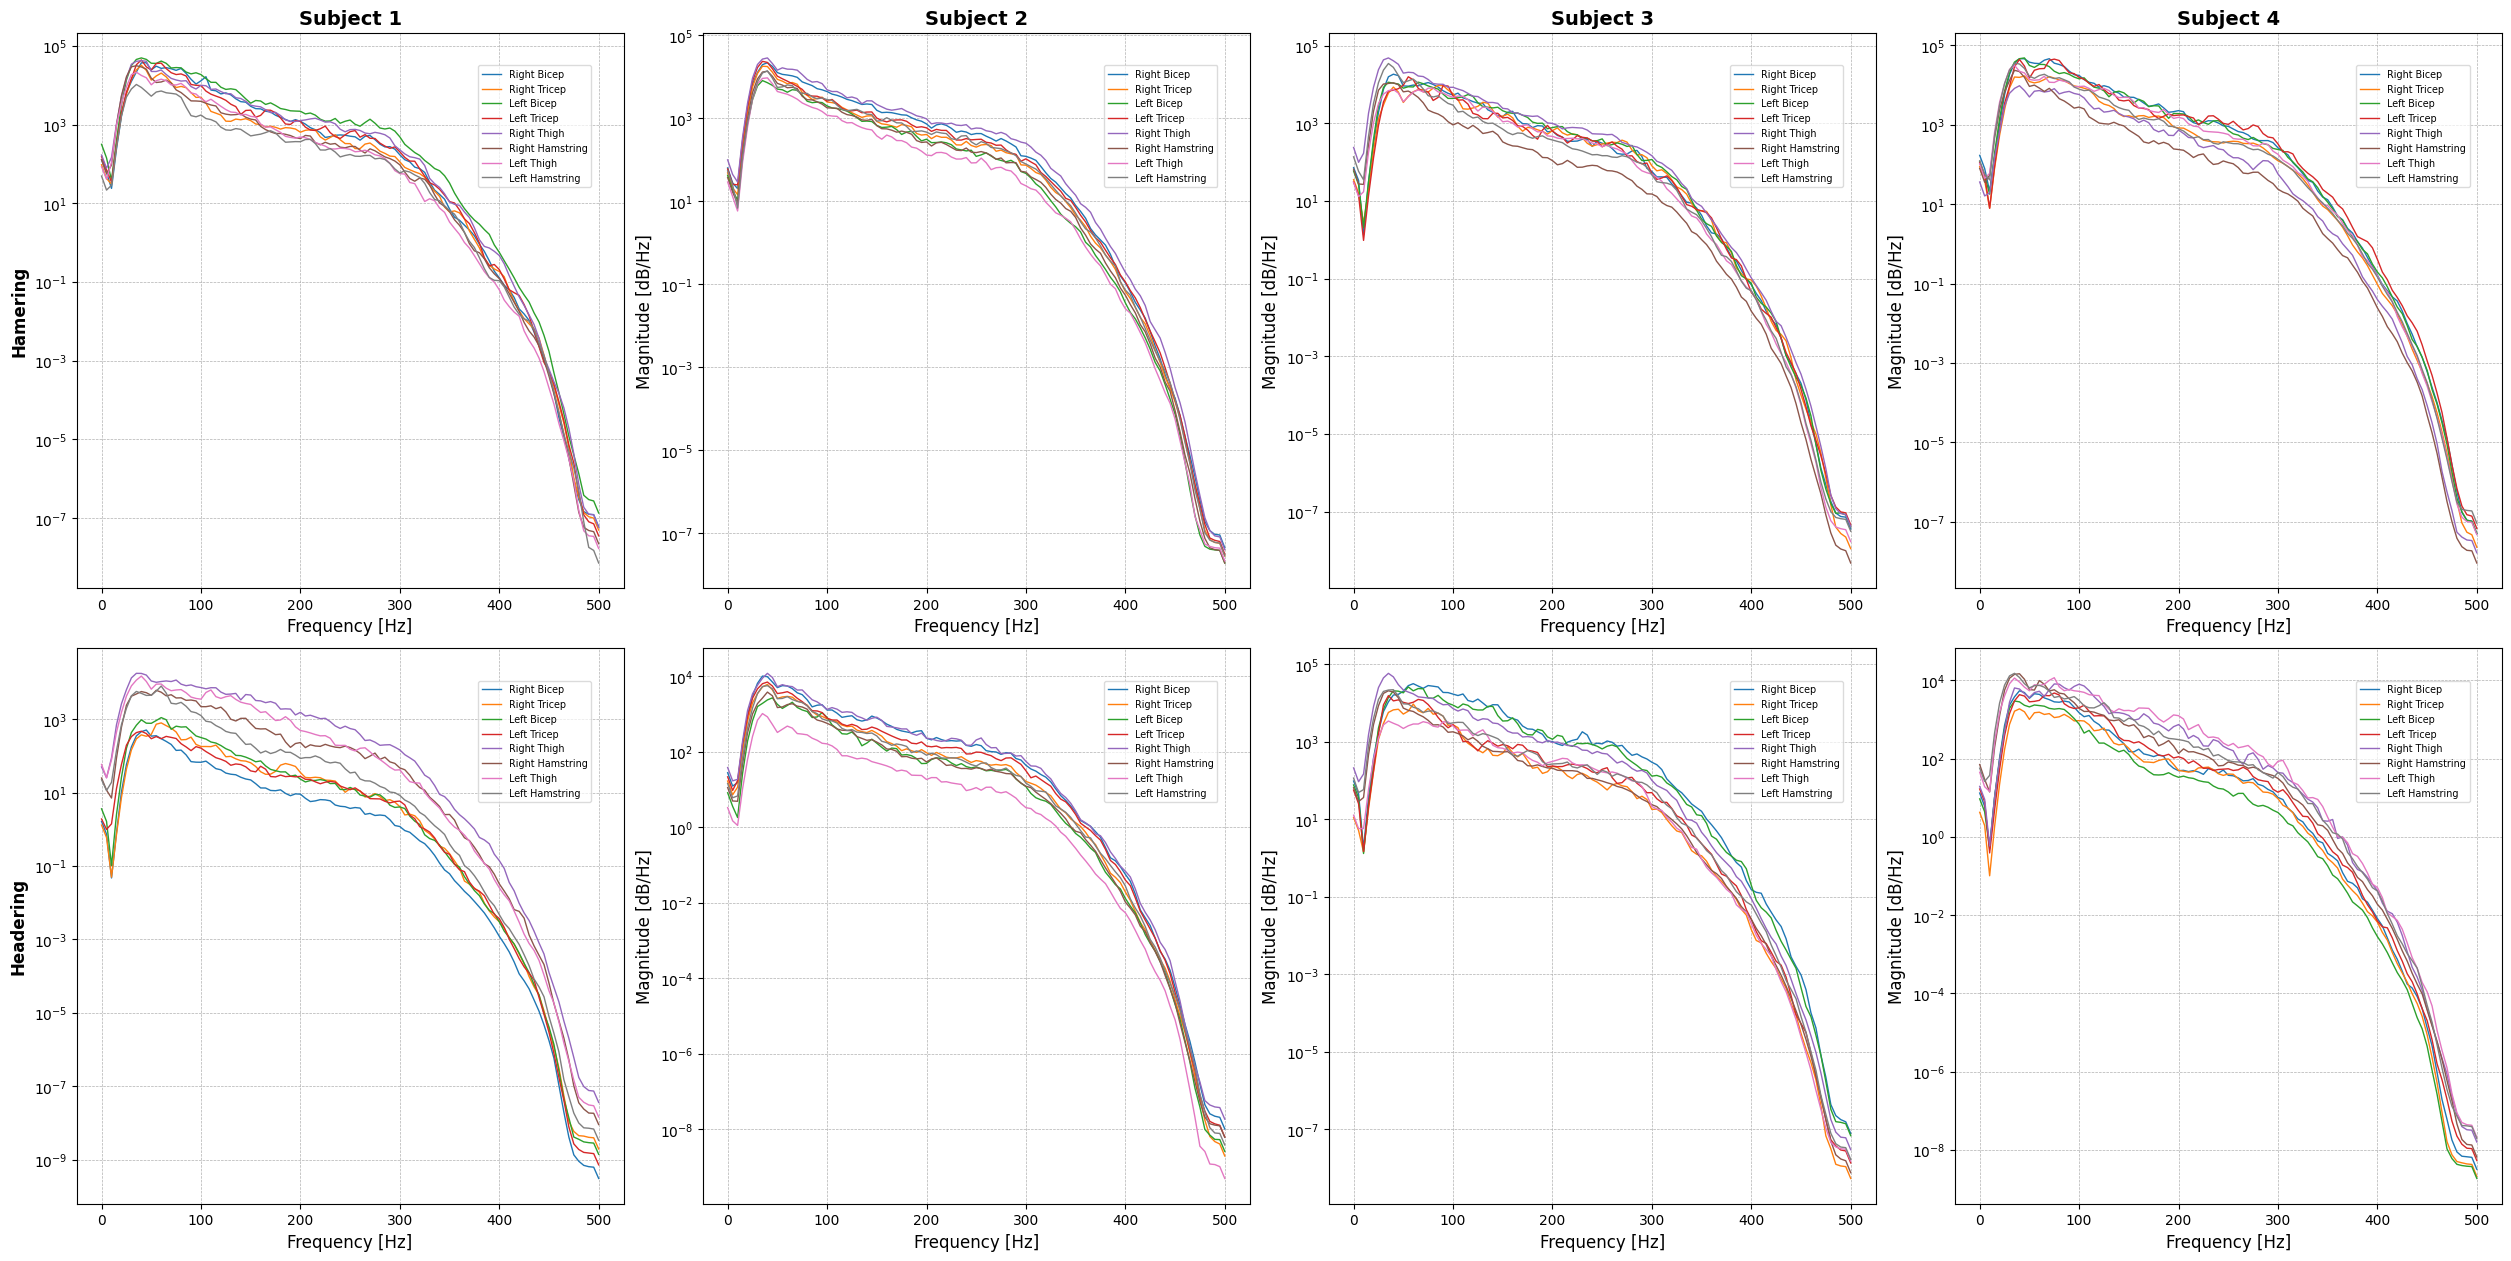

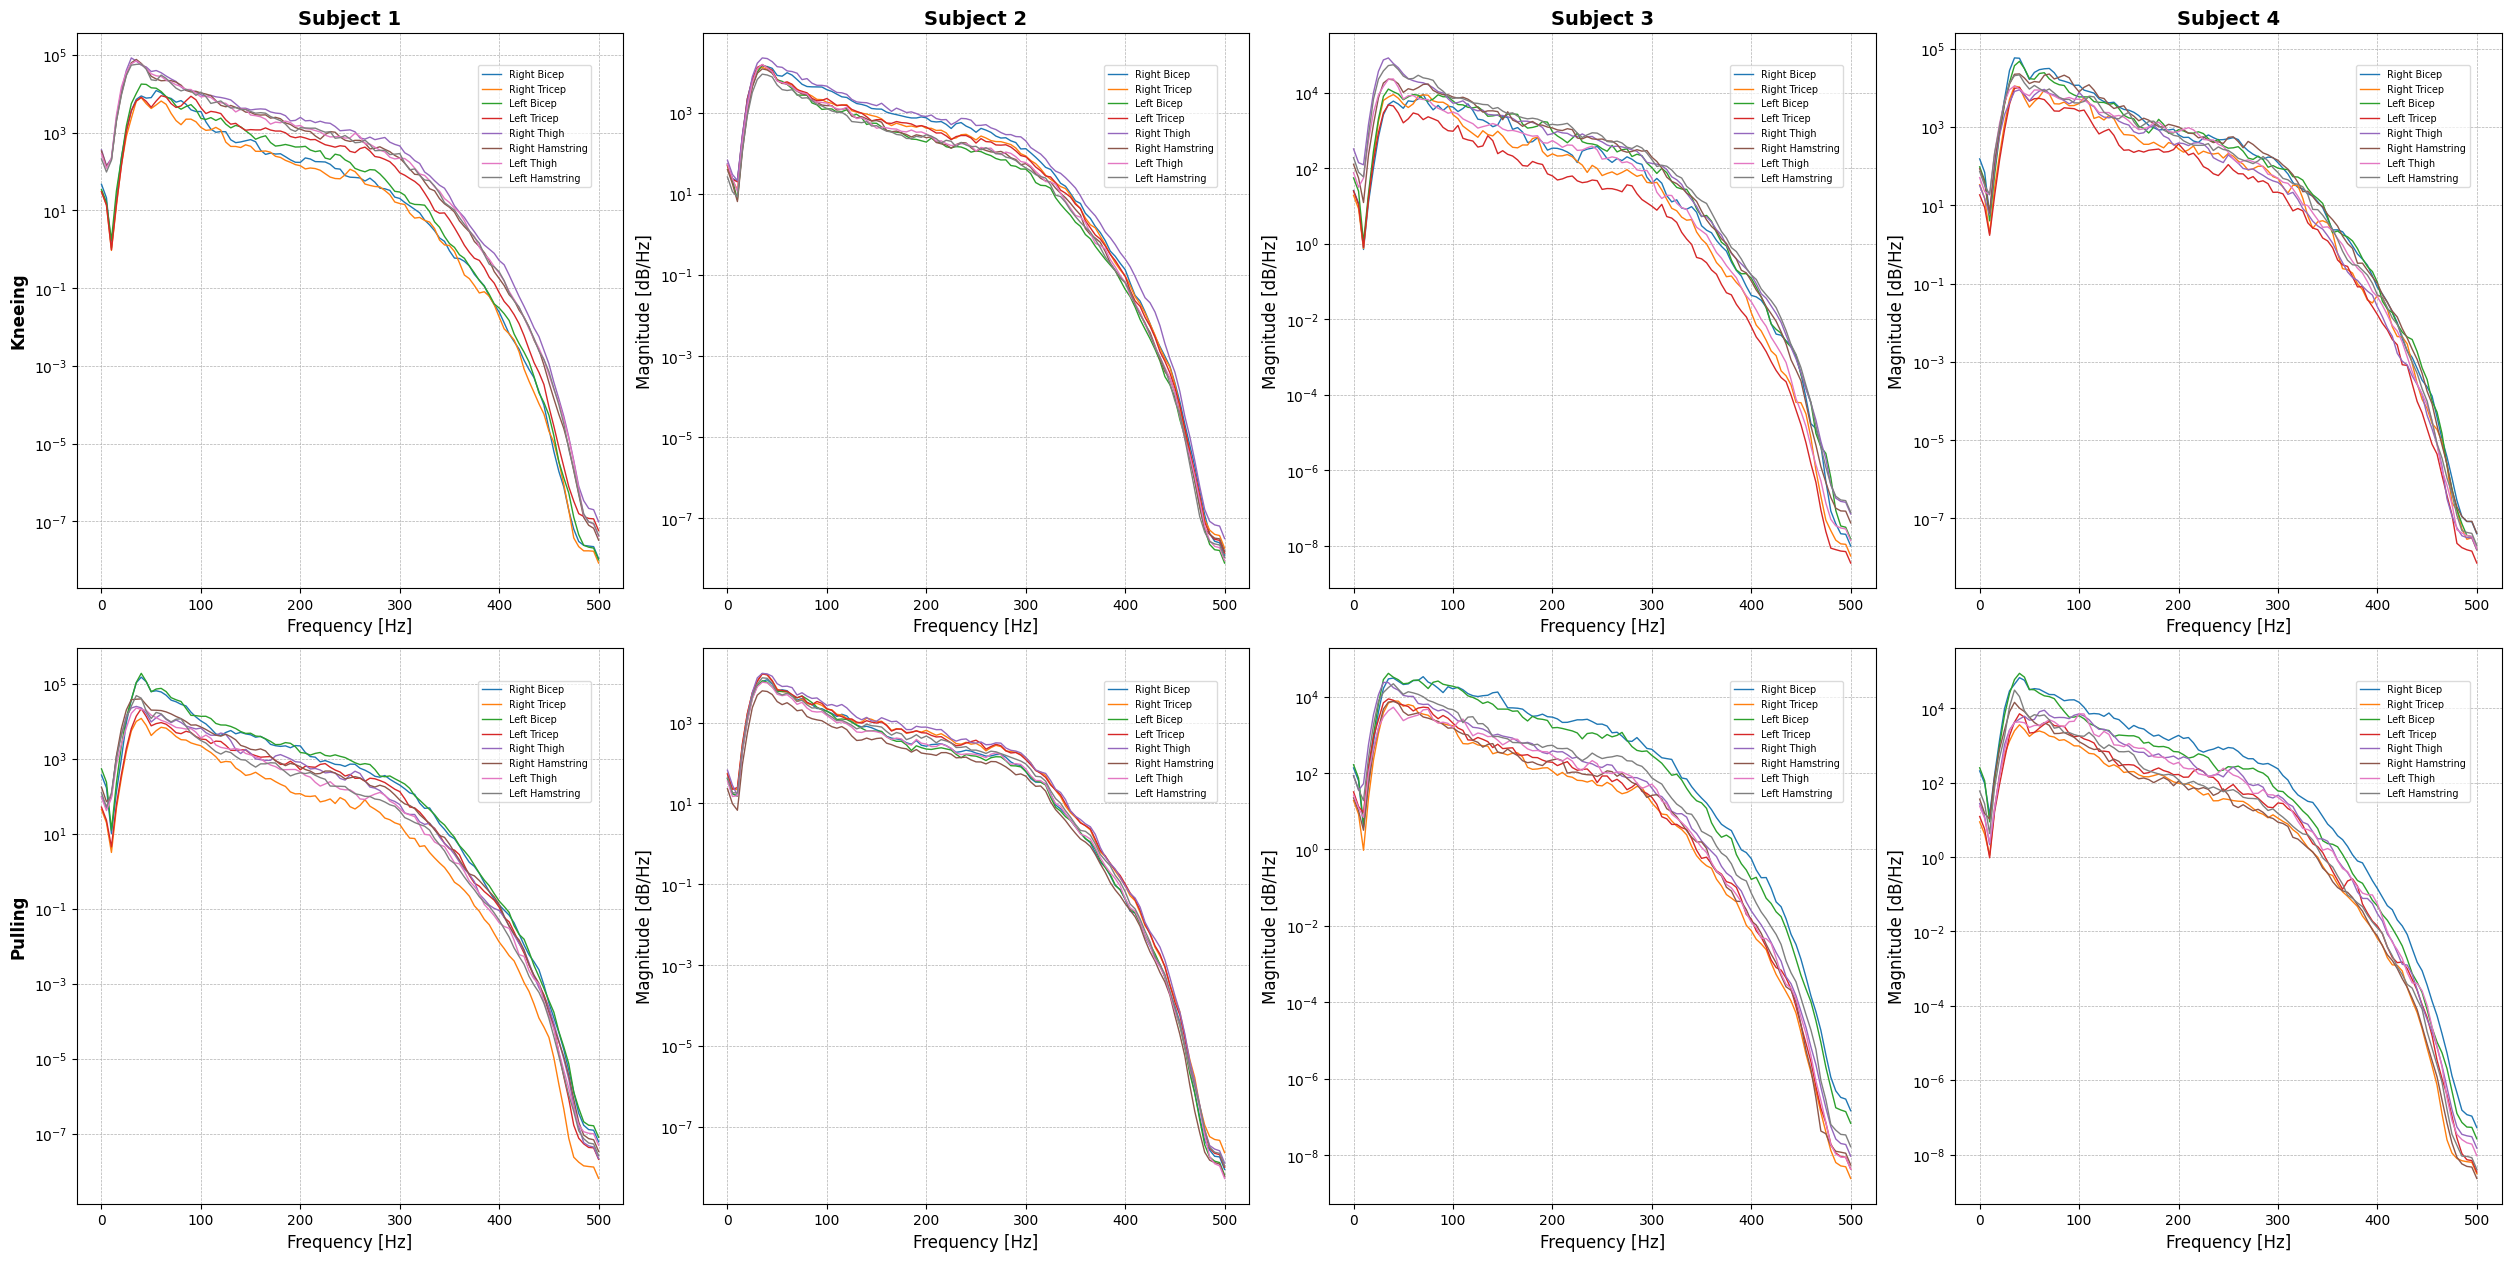

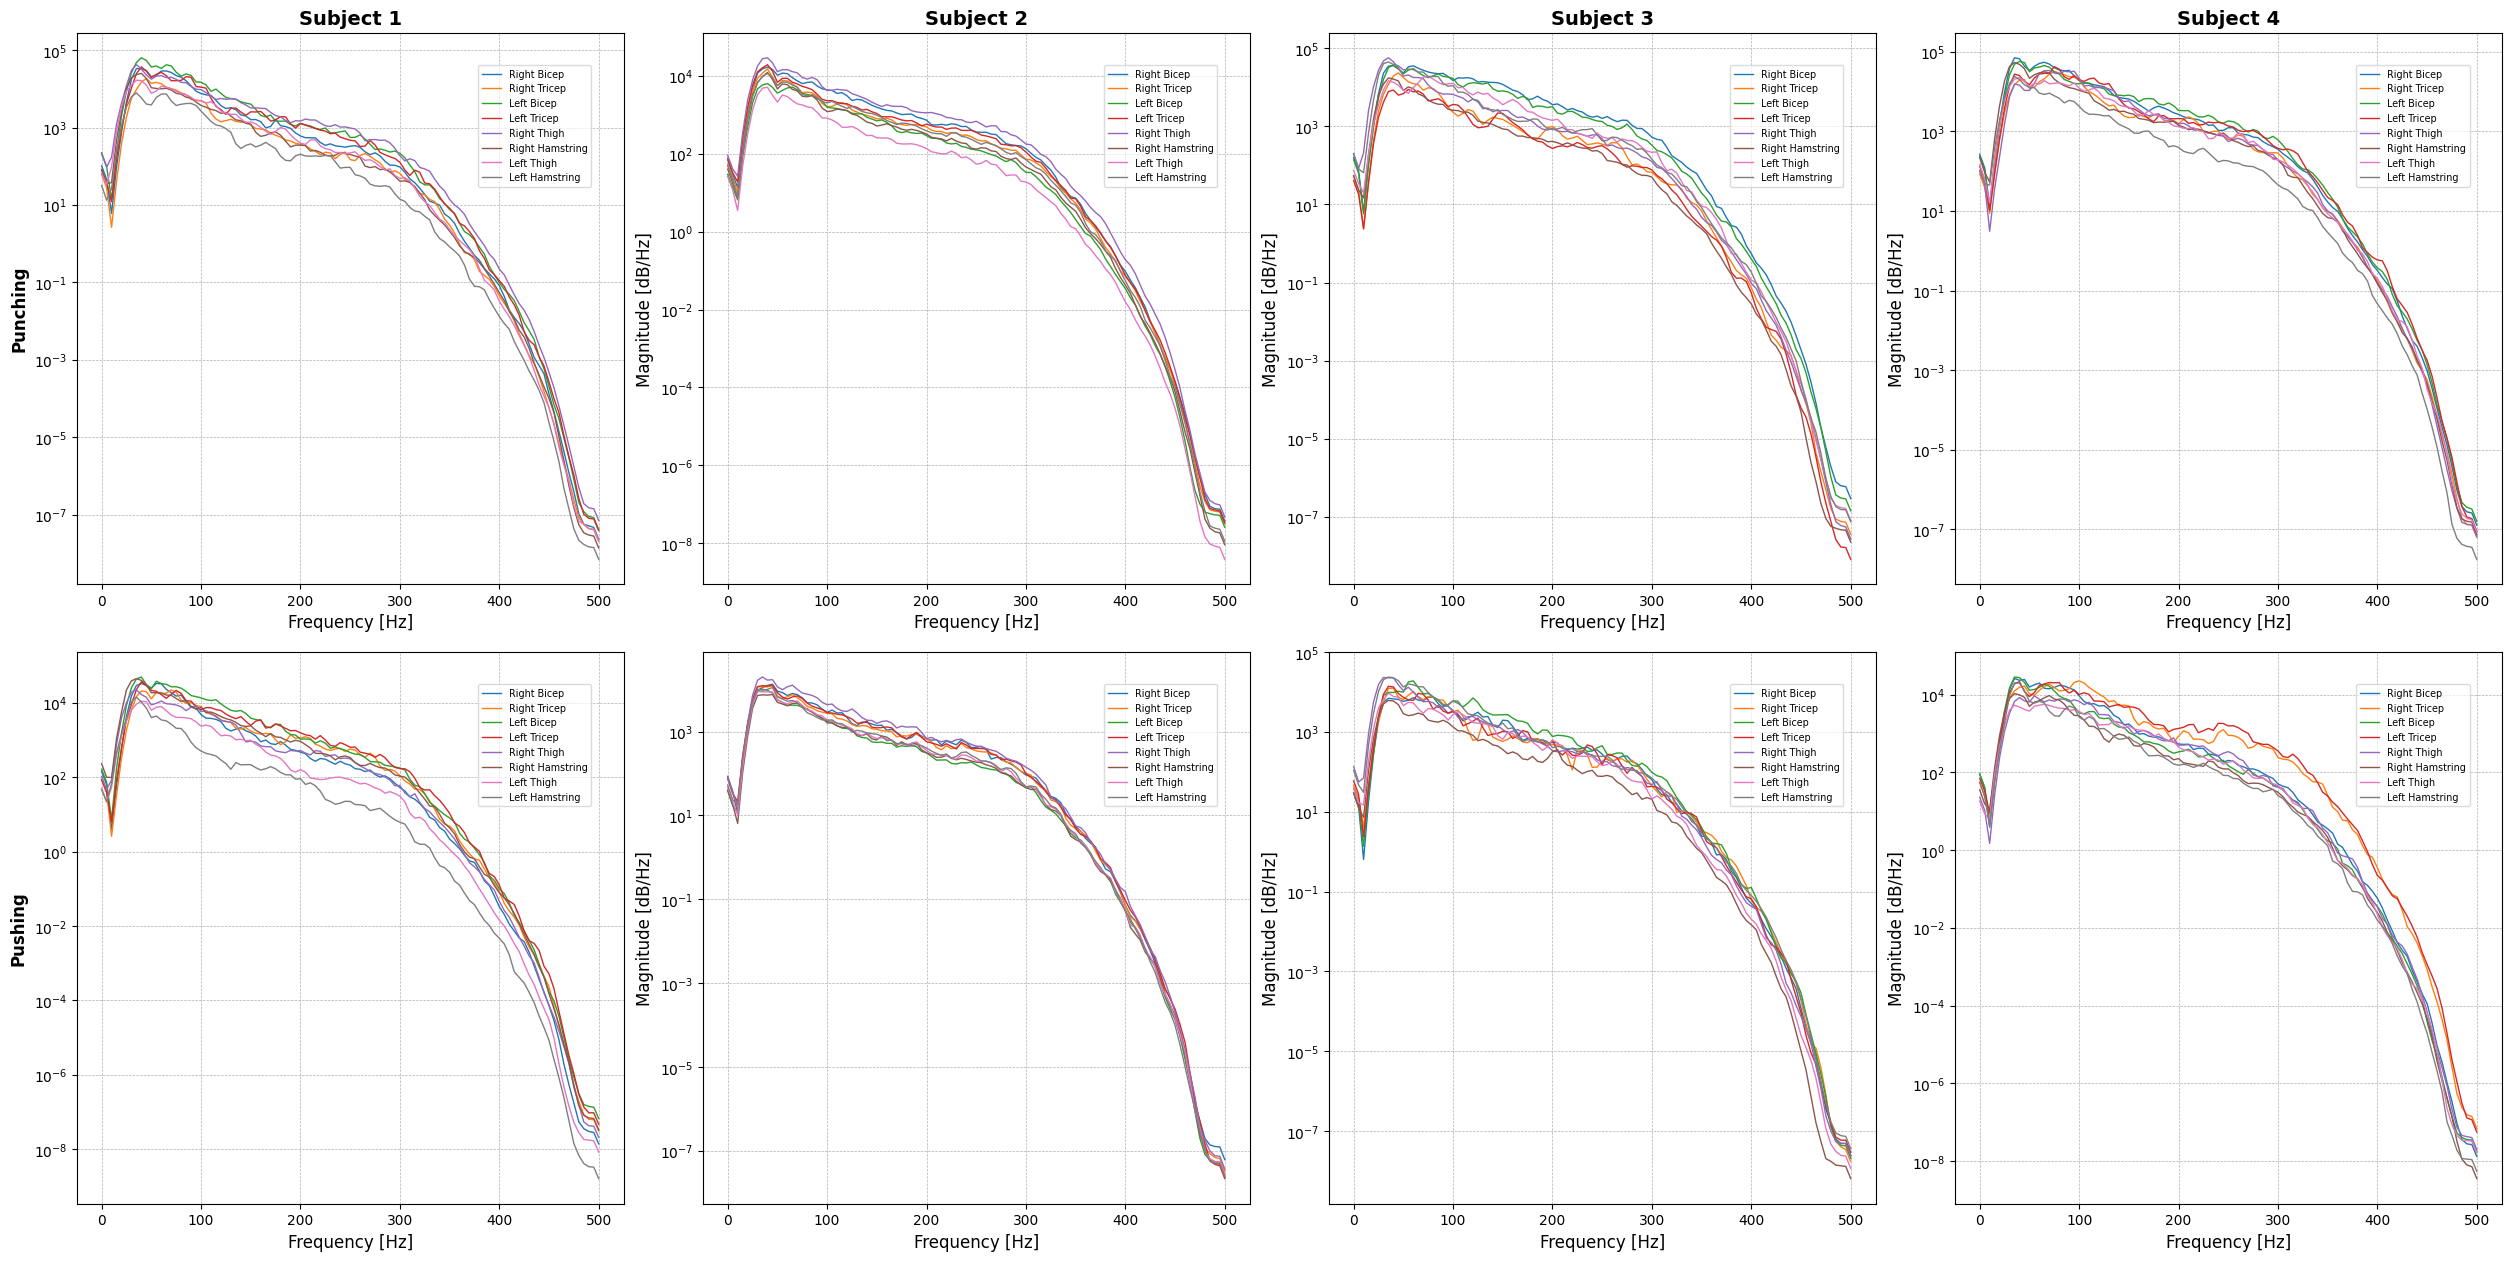

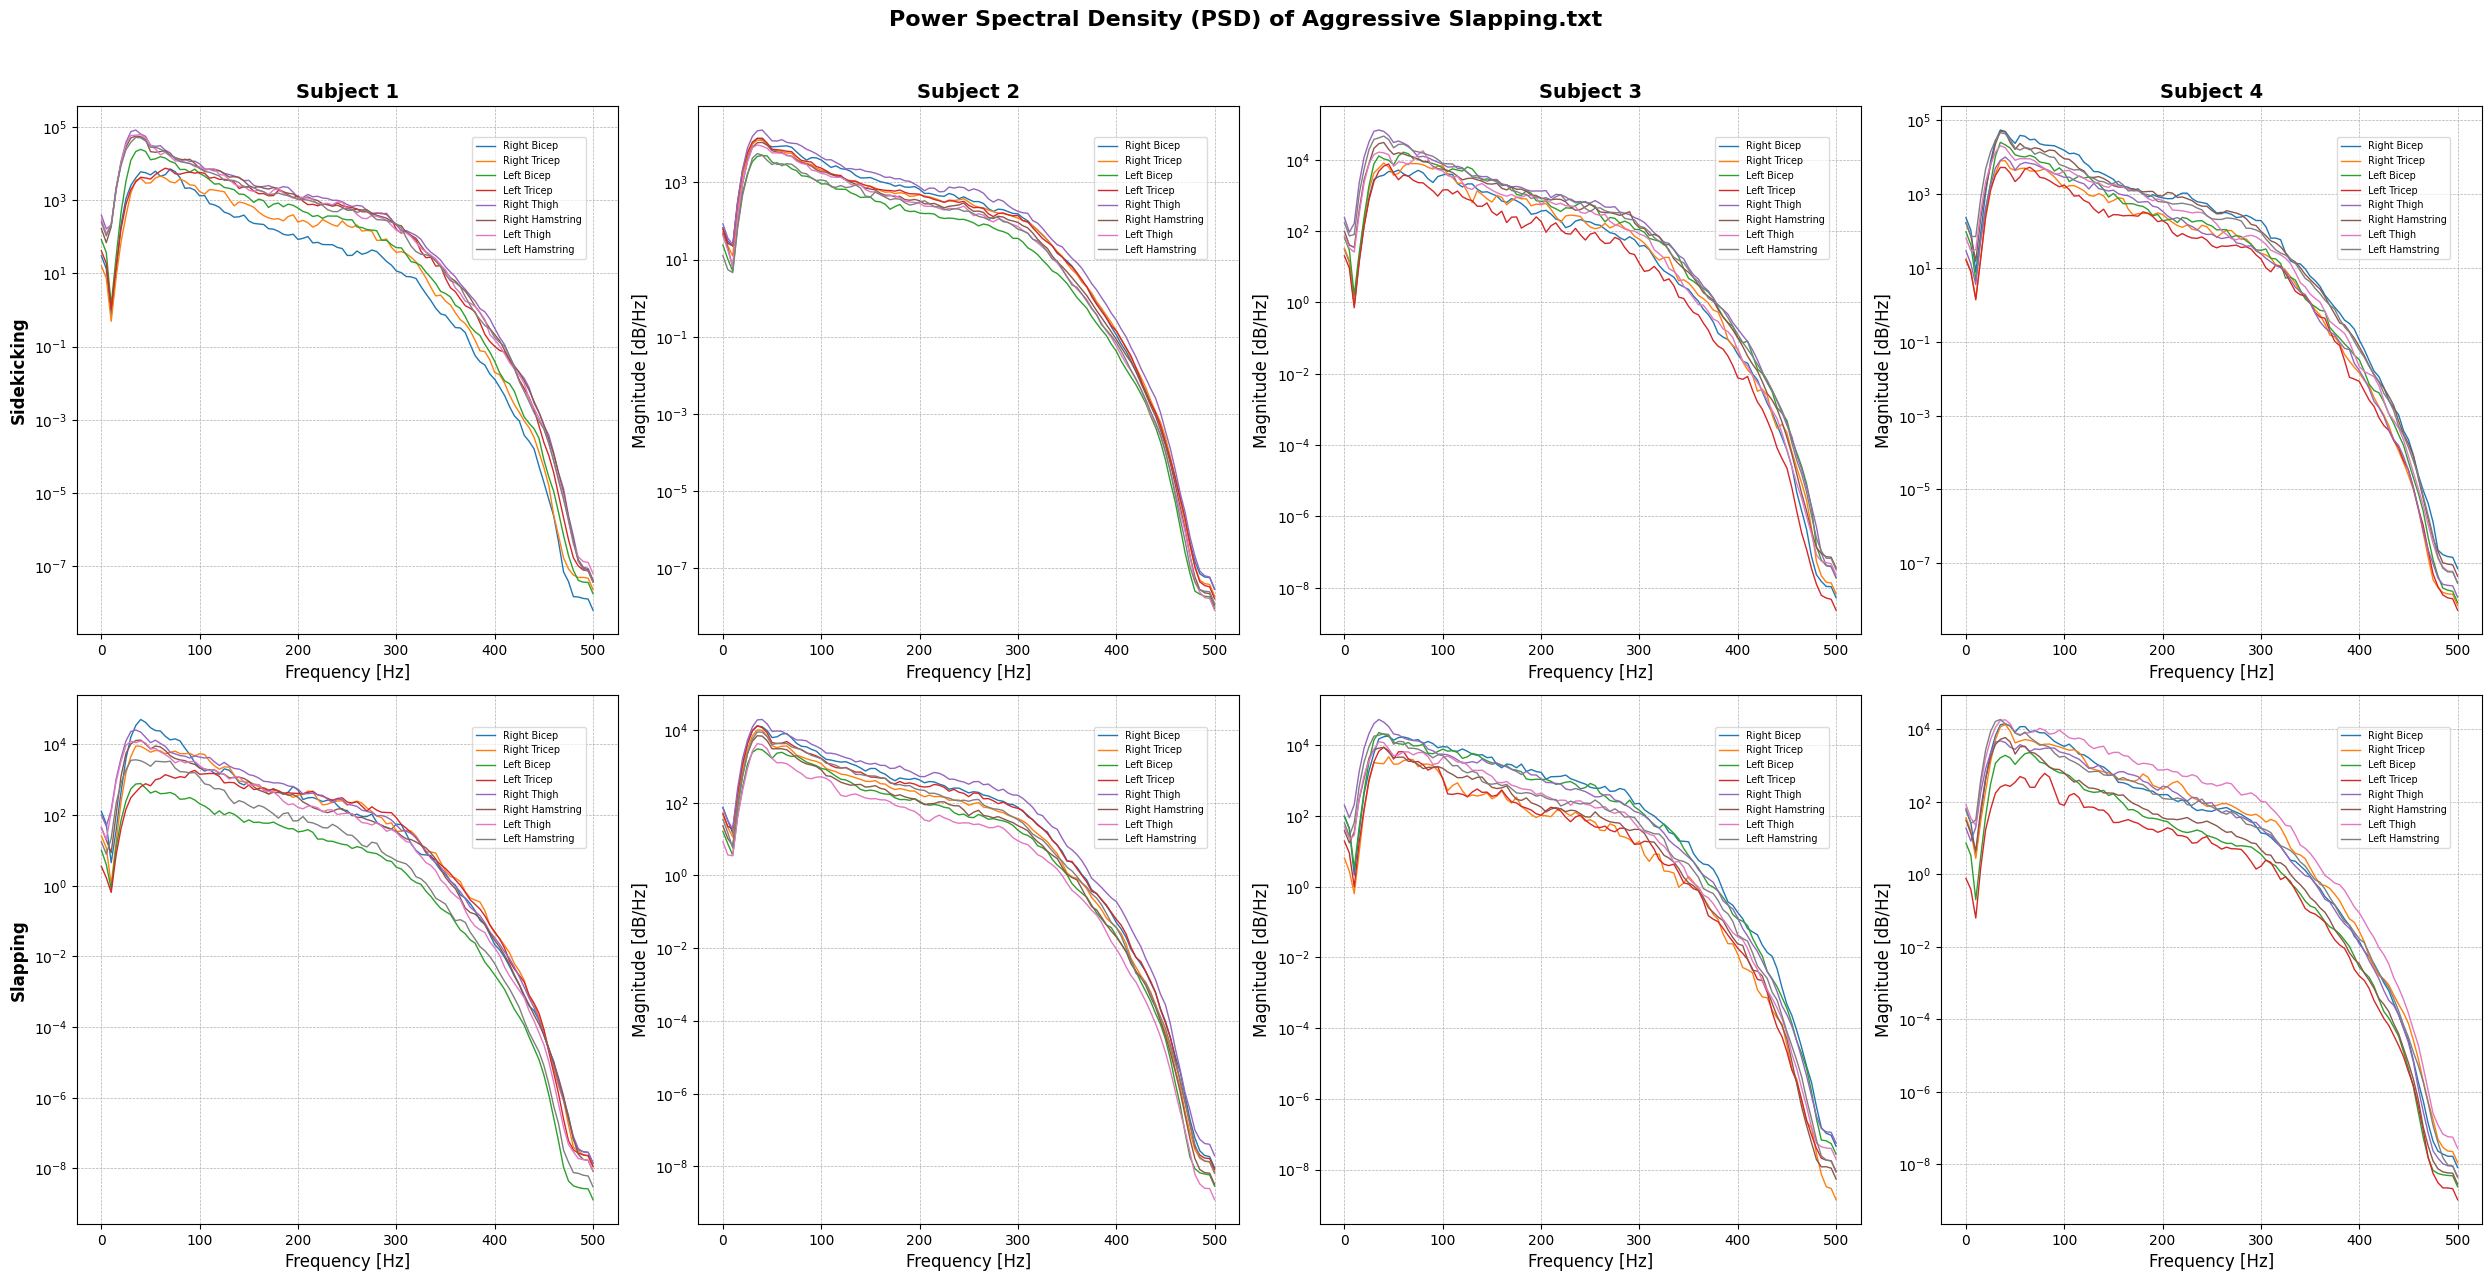

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, iirnotch, lfilter

Peak = np.zeros(shape=(1, 8))
Power = np.zeros(shape=(1, 8))
MAV = np.zeros(shape=(1, 8))
signal_mean = np.zeros(shape=(1, 8))

c = 0

for move in d:
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 4, figsize=(25,12.5), constrained_layout=True)
        c = 0
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\Aggressive\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_power = []
        tmp_mav = []

        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            nperseg = 200
            f_PSD, Pxx_PSD = welch(y, fs=Fs, nperseg=nperseg, noverlap=0.5 * nperseg)

            tmp.append(f_PSD[np.argmax(Pxx_PSD)])  
            tmp_power.append(np.sum(Pxx_PSD) * (f_PSD[1] - f_PSD[0]))  
            tmp_mav.append(np.nanmean(np.abs(y)))  

            # Plot improvements
            axes_PSD[c, i - 1].plot(f_PSD, Pxx_PSD, linewidth=1, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_yscale("log")
            axes_PSD[c, i - 1].set_xlabel("Frequency [Hz]", fontsize=12)
            axes_PSD[c, i - 1].set_ylabel("Magnitude [dB/Hz]", fontsize=12)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=10)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=14, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=12, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize="x-small", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))


        Peak = np.vstack((Peak, tmp))
        Power = np.vstack((Power, tmp_power))
        MAV = np.vstack((MAV, tmp_mav))
    c += 1
    # Bigger title for the full figure

    # Improve layout for better spacing
fig_PSD.suptitle(f"Power Spectral Density (PSD) of Aggressive {file}",fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout(pad=1)
plt.show()
